In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

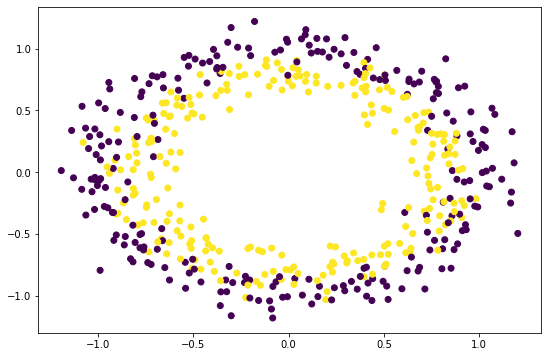

In [42]:
x,y = make_circles(n_samples=500, noise=0.1)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [72]:
x = torch.FloatTensor(x)
def l2distance(a, b):
    return torch.argmin(torch.sum((a-b)**2, dim=1),dim=0)

print("cuda:0" if torch.cuda.is_available() else "cpu")

def kmeans(x, num_clusters=2, max_iteration = 5):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    x = x.to(device)
    centroids = torch.rand(num_clusters, x.size(1)).to(device)
    for update in range(max_iteration):
        y_assign = []
        for m in range(x.size(0)):
        # for m in range(2):
            h = x[m].expand(num_clusters, -1)
            assign = l2distance(h, centroids)
            print(assign)
            y_assign.append(assign.item())
            
        y_assign = np.array(y_assign)
        if update != max_iteration-1:
            for i in range(num_clusters):
                idx = np.where(y_assign == i)[0]
                centroids[i] = torch.mean(x[idx], dim=0)
    return y_assign, centroids

cuda:0


tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(2, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(2, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(2, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(2, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
t

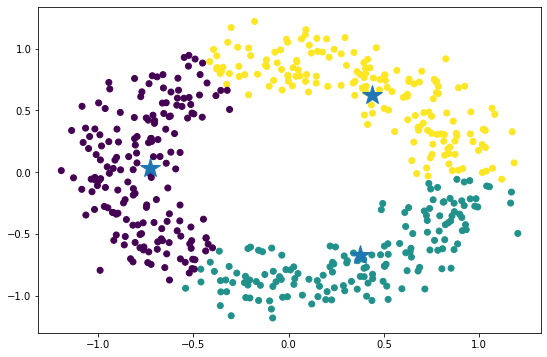

In [73]:
y_pred, centroids = kmeans(x,3)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.plot(centroids[:,0].cpu(), centroids[:,1].cpu(), '*', markersize=20)
plt.show()